<a href="https://colab.research.google.com/github/abhimithra02/Visualizing-Time-Series/blob/main/Visualizing_Time_Series_Data%2CARIMA_and_Prophet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import itertools
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image

plt.style.use('fivethirtyeight')

In [ ]:
os.chdir("A:\DATA\Imartics\Python")
dataCo2 = pd.read_csv("Co2.csv",index_col=0)

In [ ]:
dataCo2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [ ]:
dataCo2.index

Index(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19', '1958-04-26',
       '1958-05-03', '1958-05-10', '1958-05-17', '1958-05-24', '1958-05-31',
       ...
       '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17', '2001-11-24',
       '2001-12-01', '2001-12-08', '2001-12-15', '2001-12-22', '2001-12-29'],
      dtype='object', length=2284)

In [ ]:
dataCo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
co2    2225 non-null float64
dtypes: float64(1)
memory usage: 35.7+ KB


In [ ]:
### Need to convert the index into datetime format

dataCo2.index = pd.to_datetime(dataCo2.index)

In [ ]:
dataCo2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq=None)

In [ ]:
y = dataCo2["co2"].resample("MS").mean()

In [ ]:
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [ ]:
y.index.min(),y.index.max()

(Timestamp('1958-03-01 00:00:00'), Timestamp('2001-12-01 00:00:00'))

In [ ]:
y["1990":]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, Length: 144, dtype: float64

In [ ]:
y["1995-10-01":"1996-10-01"]

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

In [ ]:
y.isnull().sum()

5

In [ ]:
y = y.fillna(y.bfill())

In [ ]:
y.isnull().sum()

0

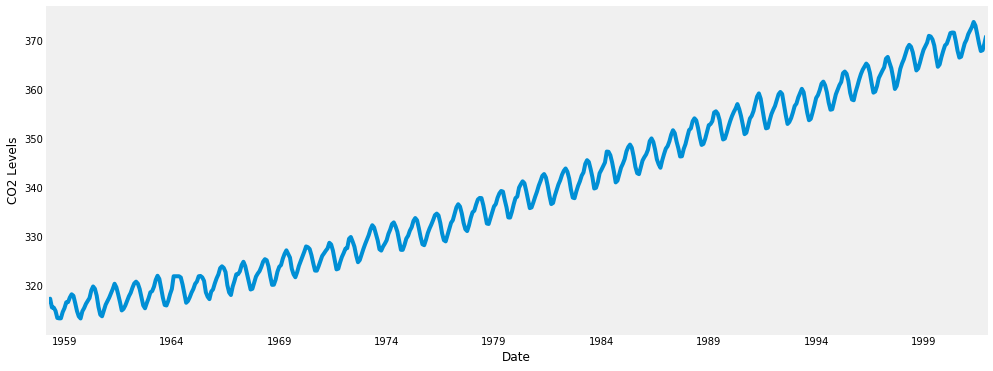

In [ ]:
y.plot(figsize = (15,6))
plt.xlabel("Date")
plt.ylabel("CO2 Levels")
plt.grid()
plt.show();

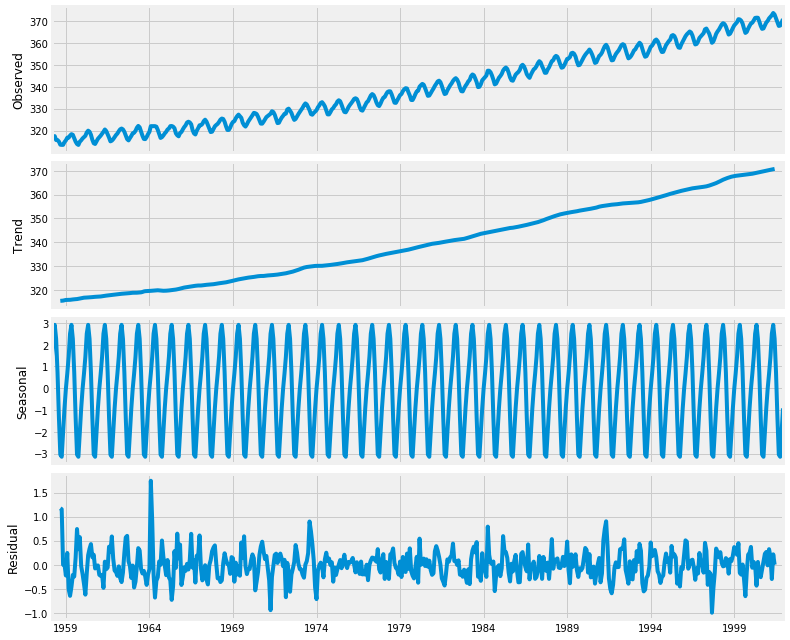

In [ ]:
from pylab import rcParams

rcParams["figure.figsize"] = 11,9

decomposition = sm.tsa.seasonal_decompose(y,model="additive")

fig = decomposition.plot()
plt.show()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624036737
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727641156
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320026
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.287855610497
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978072075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912934656
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755126321
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327718421
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067330986
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716776201
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1084.9453872064087
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.4313909247412
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893630987
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988821106
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194085


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3180      0.092      3.444      0.001       0.137       0.499
ma.L1         -0.6255      0.076     -8.177      0.000      -0.775      -0.476
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8766      0.026    -33.754      0.000      -0.927      -0.826
sigma2         0.0971      0.004     22.637      0.000       0.089       0.106


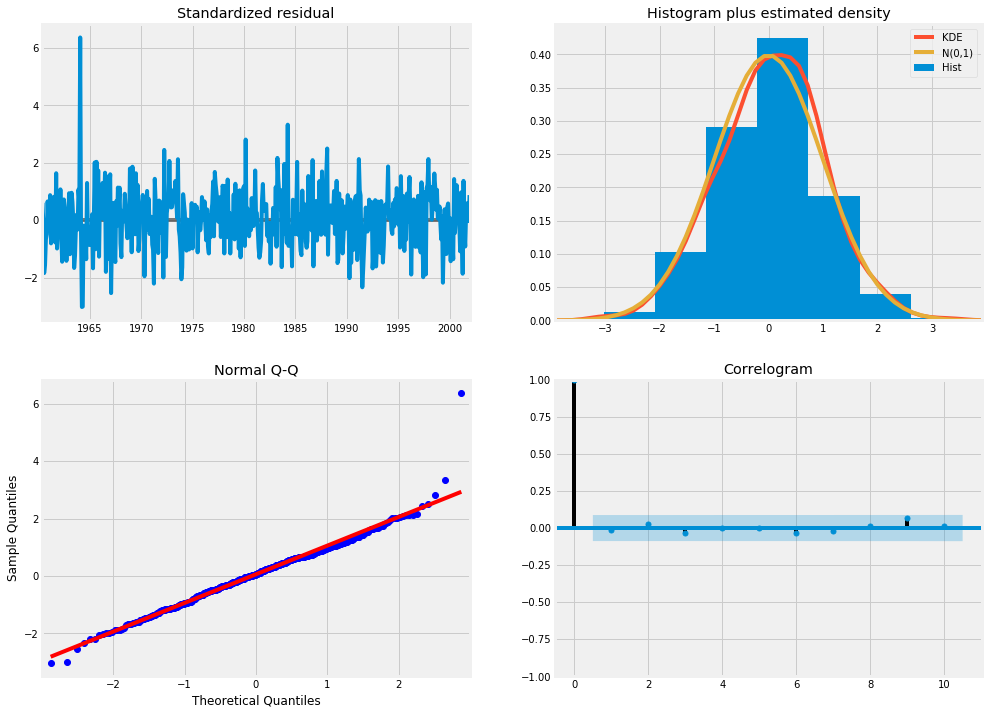

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)

pred_ci = pred.conf_int()

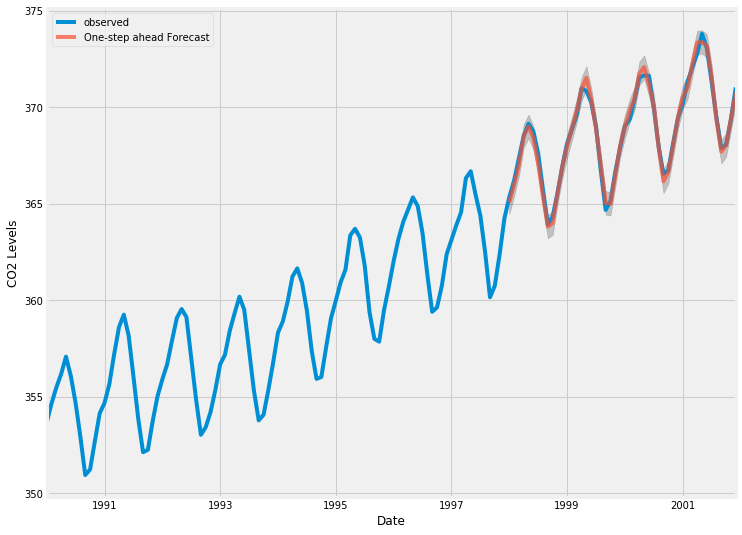

In [ ]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

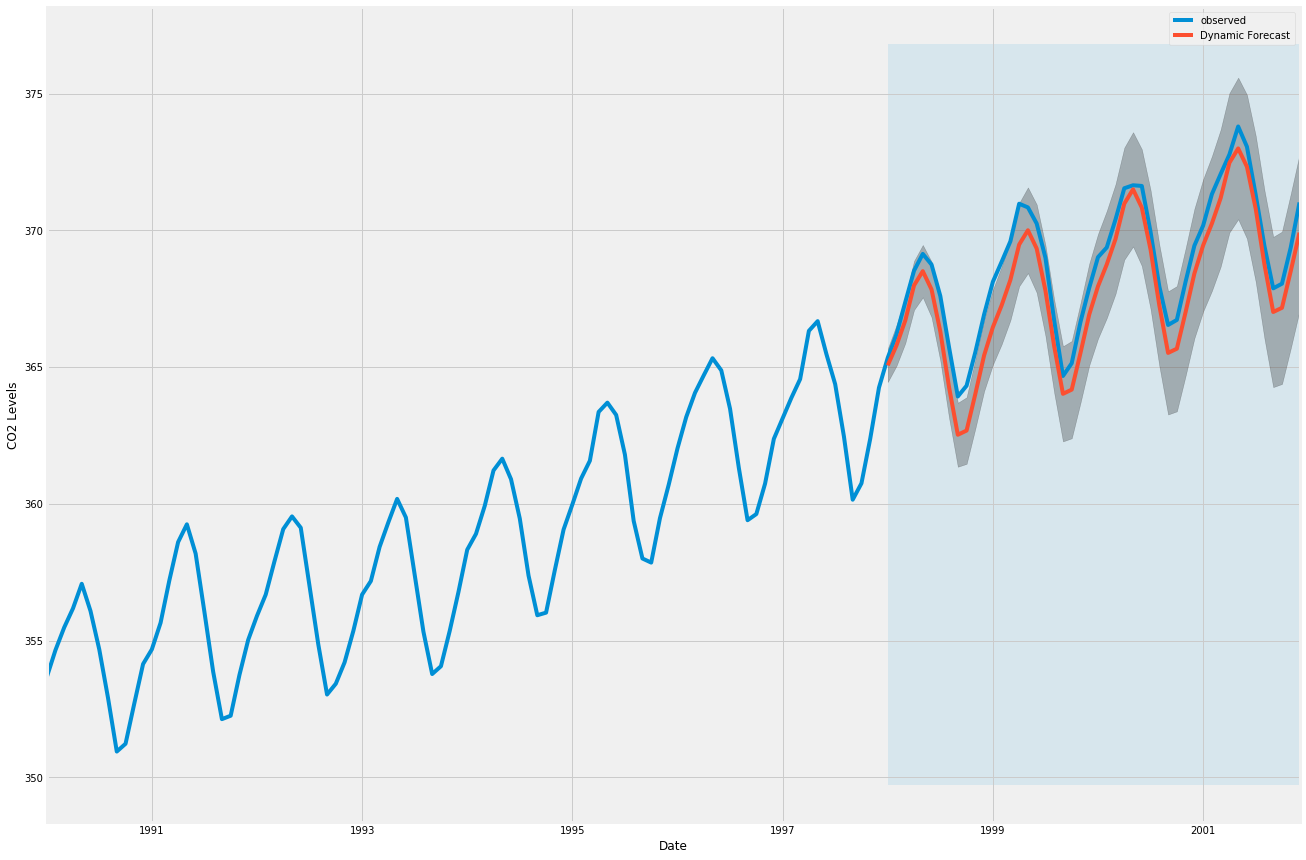

In [ ]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [ ]:
### Once again, we quantify the predictive performance of our forecasts by computing the MSE:

# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

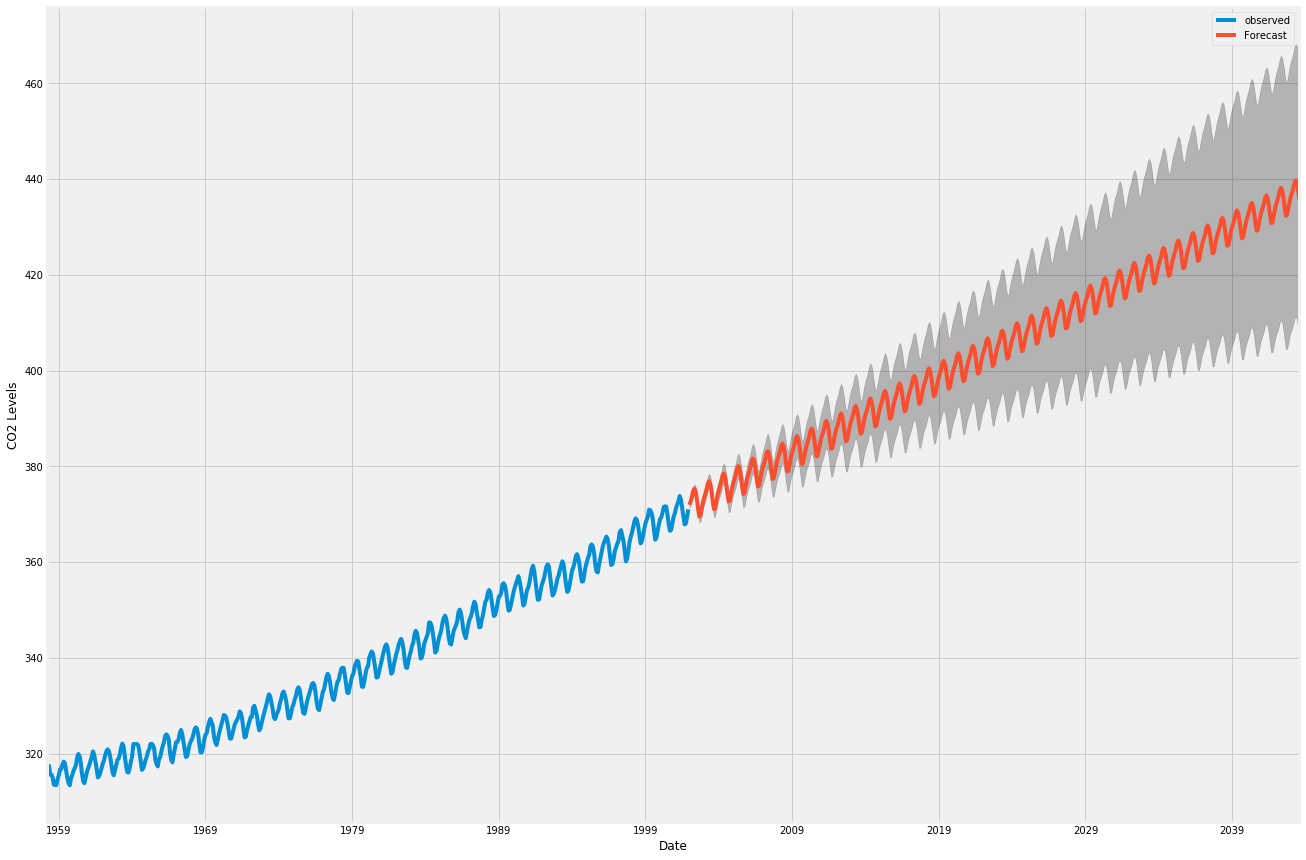

In [ ]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [ ]:
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [ ]:
prophetDataset = y.reset_index()

In [ ]:
prophetDataset.head()

,index,co2
0,1958-03-01,316.100000
1,1958-04-01,317.200000
2,1958-05-01,317.433333
3,1958-06-01,315.625000
4,1958-07-01,315.625000


In [ ]:
prophetDataset = prophetDataset.rename(columns = {"index":"ds",
                                                  "co2":"y"})

In [ ]:
prophetDataset.head()

,ds,y
0,1958-03-01,316.100000
1,1958-04-01,317.200000
2,1958-05-01,317.433333
3,1958-06-01,315.625000
4,1958-07-01,315.625000


In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
from fbprophet import Prophet
prophetModel = Prophet(interval_width=0.95)

In [ ]:
prophetModel.fit(prophetDataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predictionDates = prophetModel.make_future_dataframe(periods=36, freq='MS')
predictionDates.tail()

,ds
557,2004-08-01
558,2004-09-01
559,2004-10-01
560,2004-11-01
561,2004-12-01


In [ ]:
forecast = prophetModel.predict(predictionDates)

In [ ]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
557,2004-08-01,375.336536,372.382355,378.255396
558,2004-09-01,373.778114,370.700257,376.938606
559,2004-10-01,373.933963,370.920413,377.243067
560,2004-11-01,375.105926,371.918888,378.571549
561,2004-12-01,376.396887,372.843850,379.903352


In [ ]:
# Compute the mean square error
mse = ((forecast["yhat"] - prophetDataset["y"]) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.14


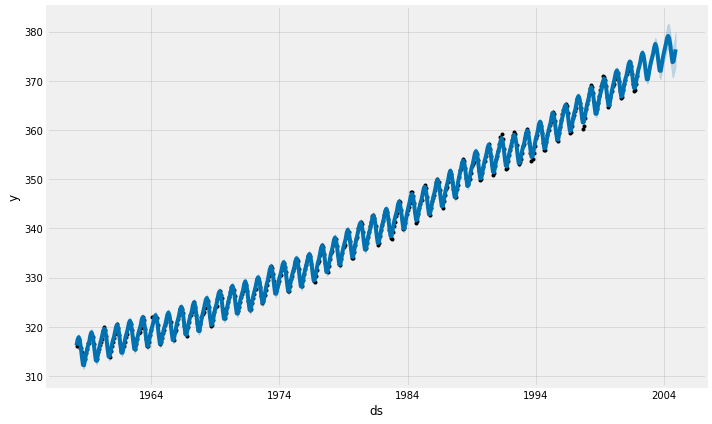

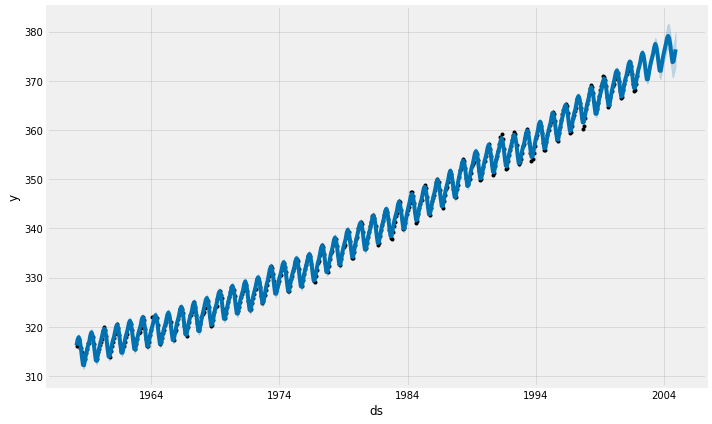

In [ ]:
### Prophet also provides a convenient function to quickly plot the results of our forecasts:

prophetModel.plot(forecast,uncertainty=True)

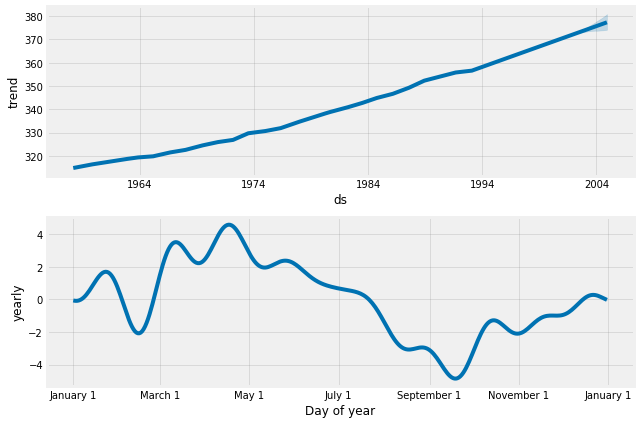

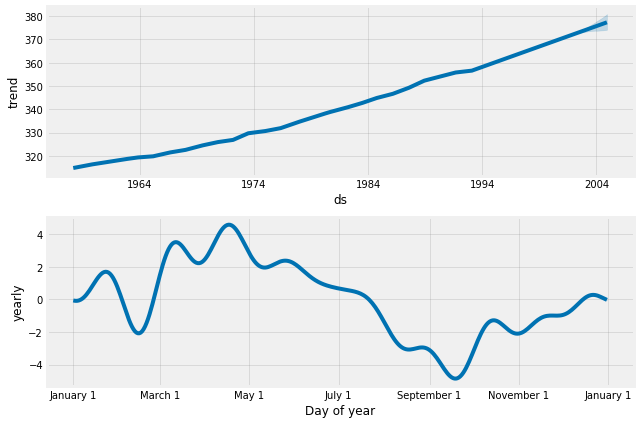

In [ ]:
prophetModel.plot_components(forecast)